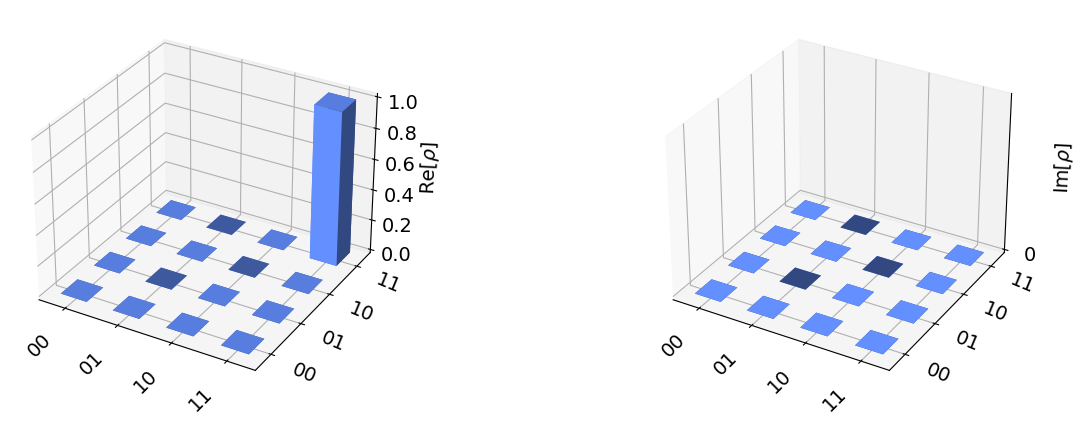

In [28]:
from qiskit import QuantumCircuit, BasicAer, execute,transpile
from qiskit.quantum_info import DensityMatrix
from qiskit.visualization import array_to_latex,plot_state_city, plot_bloch_multivector,plot_state_paulivec, plot_state_hinton,plot_state_qsphere
import numpy as np
%matplotlib inline

qc = QuantumCircuit(2, 2)
qc.h(0)
qc.cx(0,1)
qc.measure([0, 1], [0, 1])
backend = BasicAer.get_backend('statevector_simulator')
job = execute(qc, backend).result()
qc.draw("mpl")
plot_state_city(job.get_statevector())

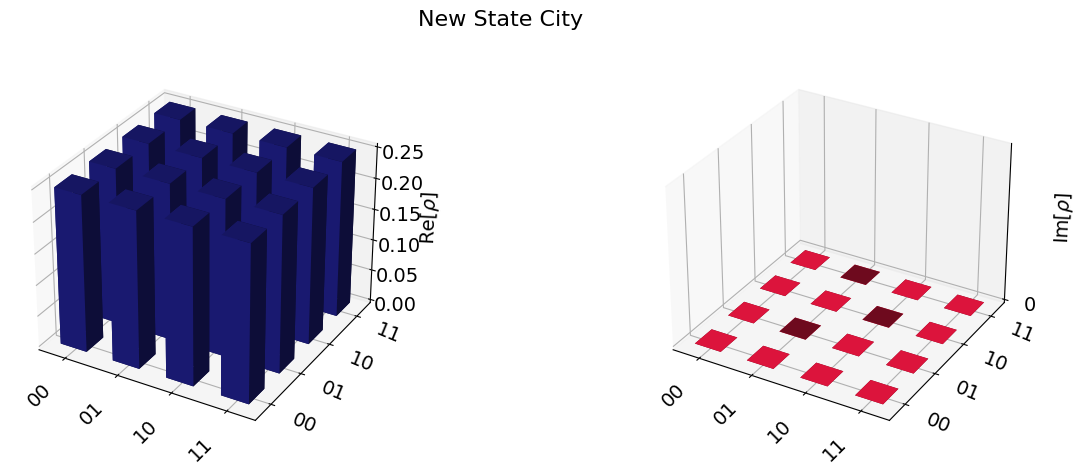

In [21]:


qc = QuantumCircuit(2)
qc.h(0)
qc.h(1)
# qc.cx(0, 1)

state = DensityMatrix(qc)
plot_state_city(state, color=['midnightblue', 'crimson'], title="New State City")

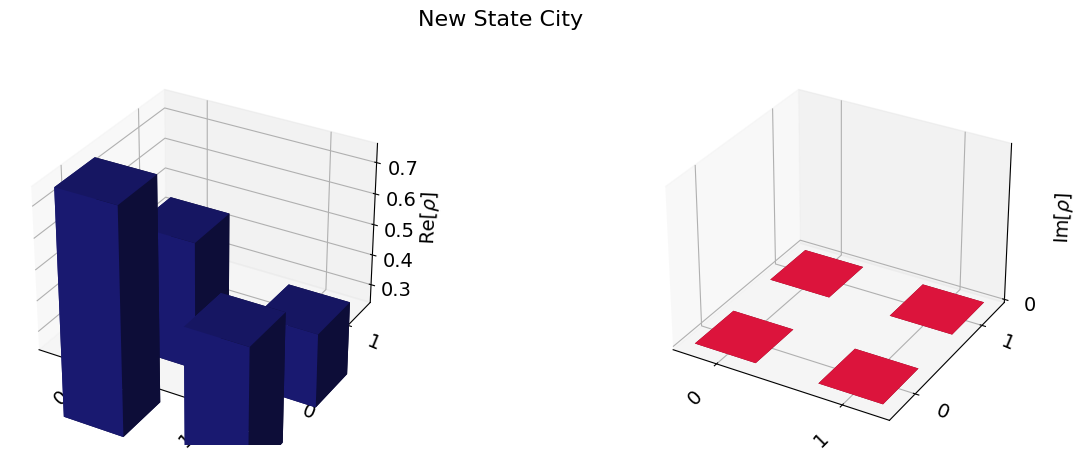

In [22]:

circuit = QuantumCircuit(1)
circuit.initialize([np.sqrt(3)/2, 1/2], 0)
state = DensityMatrix(circuit)
plot_state_city(state, color=['midnightblue', 'crimson'], title="New State City")

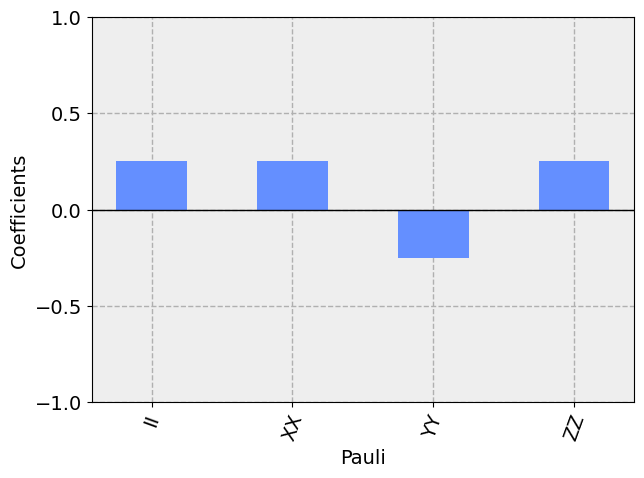

In [24]:

# quantum circuit to make a Bell state
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

meas = QuantumCircuit(2, 2)
meas.measure([0,1], [0,1])

backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)
plot_state_paulivec(psi)

In [1]:
import sympy as sp

In [4]:
Q=sp.Matrix([[7/10,2/5-1/10*sp.I],[2/5+1/10*sp.I,3/10]])
Q

Matrix([
[        0.7, 0.4 - 0.1*I],
[0.4 + 0.1*I,         0.3]])

In [5]:
Q_dag=Q.transpose().conjugate()
Q_dag


Matrix([
[        0.7, 0.4 - 0.1*I],
[0.4 + 0.1*I,         0.3]])

In [10]:
# Pauli Matrices
I = sp.Matrix([[1, 0], [0, 1]])
X = sp.Matrix([[0, 1], [1, 0]])
Y = sp.Matrix([[0, -sp.I], [sp.I, 0]])
Z = sp.Matrix([[1, 0], [0, -1]])
Z

Matrix([
[1,  0],
[0, -1]])

In [11]:
a0=sp.simplify(sp.Trace(Q_dag@I))
a0

1.00000000000000

In [12]:
a1=sp.simplify(sp.Trace(Q_dag@X))
a1  


0.800000000000000

In [13]:
a2=sp.simplify(sp.Trace(Q_dag@Y))
a2


0.200000000000000

In [14]:
a3=sp.simplify(sp.Trace(Q_dag@Z))
a3

0.400000000000000

In [18]:
Q2=1/2*(a0*I+a1*X+a2*Y+a3*Z)
Q2

Matrix([
[        0.7, 0.4 - 0.1*I],
[0.4 + 0.1*I,         0.3]])

In [19]:
from qiskit.quantum_info import Statevector,DensityMatrix,SparsePauliOp

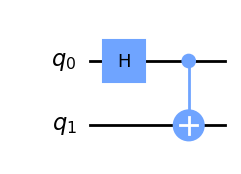

In [39]:
qc=QuantumCircuit(2)
qc.h(0)
qc.cx(0,1)
qc.draw("mpl")

In [40]:
Q=DensityMatrix(qc)
Q

DensityMatrix([[0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0.5+0.j, 0. +0.j, 0. +0.j, 0.5+0.j]],
              dims=(2, 2))


In [41]:
SparsePauliOp.from_operator(Q)

SparsePauliOp(['II', 'XX', 'YY', 'ZZ'],
              coeffs=[ 0.25+0.j,  0.25+0.j, -0.25+0.j,  0.25+0.j])

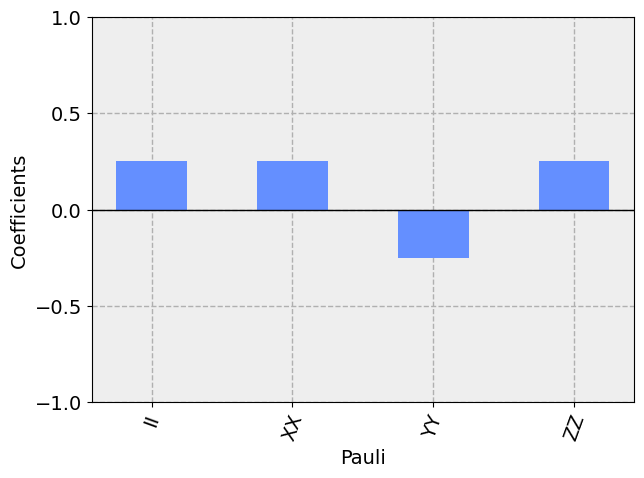

In [42]:
Q.draw('paulivec')

In [43]:
from math import sqrt
Qp=1/sqrt(3)*(Statevector([0,1,1,0,1,0,0,0]))
array_to_latex(Qp)

<IPython.core.display.Latex object>

In [44]:
Q=DensityMatrix(Qp)
array_to_latex(Q)

<IPython.core.display.Latex object>

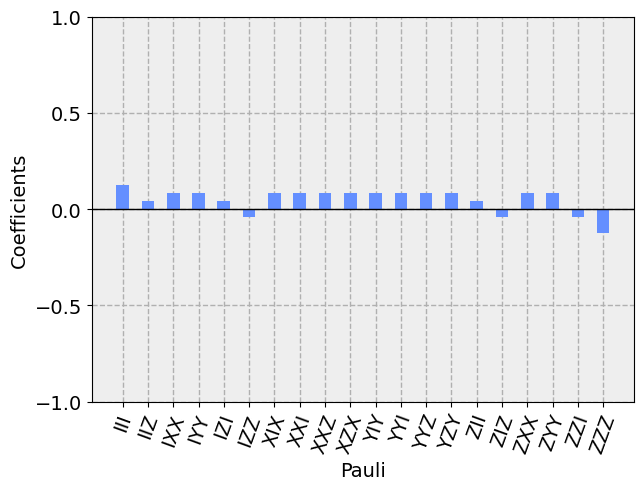

In [45]:
Q.draw('paulivec')

In [46]:
SparsePauliOp.from_operator(Q)

SparsePauliOp(['III', 'IIZ', 'IXX', 'IYY', 'IZI', 'IZZ', 'XIX', 'XXI', 'XXZ', 'XZX', 'YIY', 'YYI', 'YYZ', 'YZY', 'ZII', 'ZIZ', 'ZXX', 'ZYY', 'ZZI', 'ZZZ'],
              coeffs=[ 0.125     +0.j,  0.04166667+0.j,  0.08333333+0.j,  0.08333333+0.j,
  0.04166667+0.j, -0.04166667+0.j,  0.08333333+0.j,  0.08333333+0.j,
  0.08333333+0.j,  0.08333333+0.j,  0.08333333+0.j,  0.08333333+0.j,
  0.08333333+0.j,  0.08333333+0.j,  0.04166667+0.j, -0.04166667+0.j,
  0.08333333+0.j,  0.08333333+0.j, -0.04166667+0.j, -0.125     +0.j])

SparsePauliOp(['III'],
              coeffs=[0.125+0.j])